In [152]:
%run prepare_data.ipynb

In [153]:
import numpy as np
from matplotlib import pyplot as plt

In [154]:
training_data = read_csv_int('vornamen_as_features')
test_data = read_csv_int('vornamen_test_data')

In [155]:
import time
def timing(f):
    def wrap(*args):
        time1 = time.time()
        ret = f(*args)
        time2 = time.time()
        print('{:s} function took {:.3f} ms'.format(f.__name__, (time2-time1)*1000.0))

        return ret
    return wrap

In [156]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [157]:
def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

In [158]:
def hypothesis(data_point, weights):
    z = 0
    for i in range(len(data_point)):
        z = z + weights[i] * data_point[i]
    # weights is one longer than features in data_point for bias unit
    z = z + weights[-1] # just add the bias unit weight
    return z

In [159]:
def adjustment(weights, data_point, derivative_cost_prediction):
    for i in range(len(weights) - 1):
        weights[i] = weights[i] - derivative_cost_prediction * data_point[i]
    weights[-1] = weights[-1] - derivative_cost_prediction * 1 # bias weight
    return weights

5000
10000
15000
train_model function took 49305.534 ms


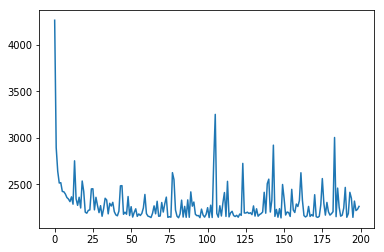

In [162]:
@timing
def train_model(training_data):
    iterations = 20000
    learning_rate = 0.05
    costs = []
    
    weights = []

    for i in range(len(training_data[0])): # number of features + bias unit == training_data length
        #random weight initilization
        weights.append(np.random.uniform(low=i/10, high=i/10+0.1, size=1)[0])
    
    for i in range(iterations):
        # select random datapoint for training
        data_point = training_data[np.random.randint(len(training_data))]

        # [:-1] to cut out the value we want to predict
        z = hypothesis(data_point[:-1], weights)

        prediction = sigmoid(z)
        target = data_point[-1]
        cost = np.square(prediction - target)

        if i % 100 == 0:
            c = 0
            for j in range(len(training_data)):
                track_z = hypothesis(training_data[j][:-1], weights)            
                # add prediction - target to cost
                c += np.square(sigmoid(track_z) - training_data[j][-1])
            costs.append(c)

        if i % 5000 == 0 and i > 0:
            print(i)

        derivative_cost_prediction = learning_rate * 2 * (prediction - target) * sigmoid_p(z)
        
        weights = adjustment(weights, data_point[:-1], derivative_cost_prediction)

    fig = plt.plot(costs)
    return weights

weights = train_model(np_array_training_data)

In [163]:
def calculate_accuracy(test_data, weights):
    count_true = 0
    for data in test_data:
        z = hypothesis(data[:-1], weights)
        prediction = sigmoid(z)
        
        if prediction > 0.5:
            prediction = 1
        else:
            prediction = 0
        
        if data[-1] == prediction:
            count_true = count_true + 1
    
    return (count_true * 100) / len(test_data)

In [164]:
accuracy = calculate_accuracy(test_data, weights)

print(accuracy)

73.16276537833424
